---
title: Titanic Wrangling
author: Ben Laufer
format:
    html:
        code-fold: true
embed-resources: true
---

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [31]:
#libraries
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, labs

In [6]:
# Import the titanic dataset here
df_titanic = pd.read_csv('data/train.csv')

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [16]:
# Code here
#filter
class_and_embarked = df_titanic[["Pclass", "Embarked"]]

#create joint distribution
joint_distr = pd.crosstab(class_and_embarked["Pclass"], class_and_embarked["Embarked"])
joint_distr

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [23]:
# Code here
#the conditional distribution of their class given where they embarked
given_embarked = pd.crosstab(class_and_embarked['Pclass'], class_and_embarked['Embarked'], normalize='columns')


#the conditional distribution of where they embarked given their class
given_class = pd.crosstab(class_and_embarked['Embarked'], class_and_embarked['Pclass'], normalize='columns')


In [26]:
given_class
#What proportion of 3rd class passengers embarked at Southampton?
#71.8%

Pclass,1,2,3
Embarked,,,
C,0.397196,0.092391,0.134420
Q,0.009346,0.016304,0.146640
S,0.593458,0.891304,0.718941


In [28]:
given_embarked
#What proportion of Southampton passengers were in 3rd class?
#54.8%

Embarked,C,Q,S
Pclass,,,
1,0.505952,0.025974,0.197205
2,0.101190,0.038961,0.254658
3,0.392857,0.935065,0.548137


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

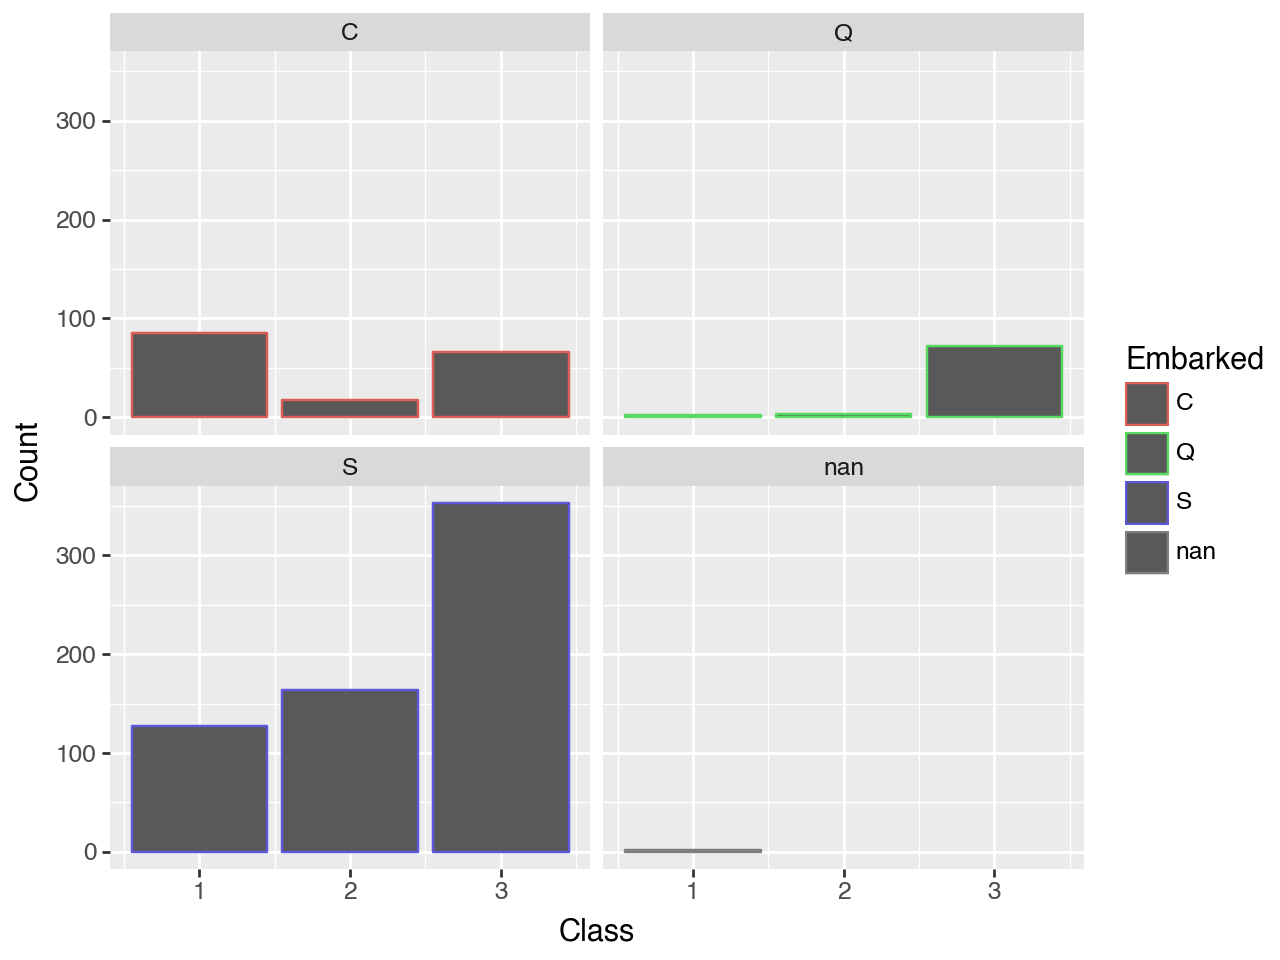

In [37]:
# Code here
(ggplot(df_titanic, aes(x = 'Pclass', color = 'Embarked'))
+ geom_bar()
+ facet_wrap('Embarked')
+ labs(x = 'Class', y = 'Count')
)